## ASSIGNMENT 4

Ch.05: Exercises 3, 5, 6, 9

**Shamir Cardenas/vea930**

## Exercise 3

We now review k-fold cross-validation.
(a) Explain how k-fold cross-validation is implemented.
(b) What are the advantages and disadvantages of k-fold cross-
validation relative to:
i. The validation set approach?
ii. LOOCV?

(a) K-fold cross-validation works by randomly dividing the data into k approximately equal-sized parts or "folds." The model is trained k times: each time, one fold is held out as a validation set, and the remaining k-1 folds are used for training. The performance metric (e.g., accuracy or MSE) is recorded each time, and the final result is the average performance across all k folds. Common choices for k are 5 or 10.

(b)
i. Compared to the validation set approach:
K-fold cross-validation provides a more stable estimate of test error because it averages over multiple validation sets. The validation set approach uses only a single split, which can lead to high variance in the performance estimate depending on how the data is divided.


ii. Compared to LOOCV (Leave-One-Out Cross-Validation):
LOOCV uses a fold size of 1, which means it trains the model n times (once for each observation). This leads to a lower bias estimate of the true test error but tends to have higher variance and is computationally expensive. K-fold is a good compromise, offering a better trade-off between bias, variance, and computation time.

## Exercise 5

In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.

## **5a**

Fit a logistic regression model that uses income and balance to
predict default.

## **5b**

Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.

ii. Fit a multiple logistic regression model using only the train-
ing observations.

iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of
default for that individual, and classifying the individual to
the default category if the posterior probability is greater
than 0.5.

iv. Compute the validation set error, which is the fraction of
the observations in the validation set that are misclassified.

In [58]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
import ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


In [68]:
Default = load_data('Default')

In [70]:
Default.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [72]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [74]:
Default.isnull().values.any()

False

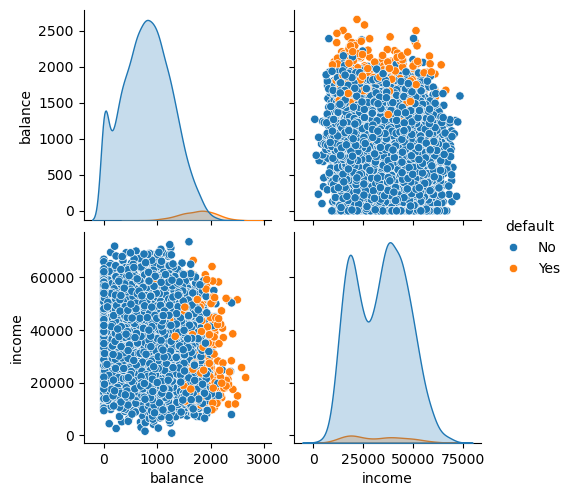

In [76]:
sns.pairplot(Default, hue = 'default')

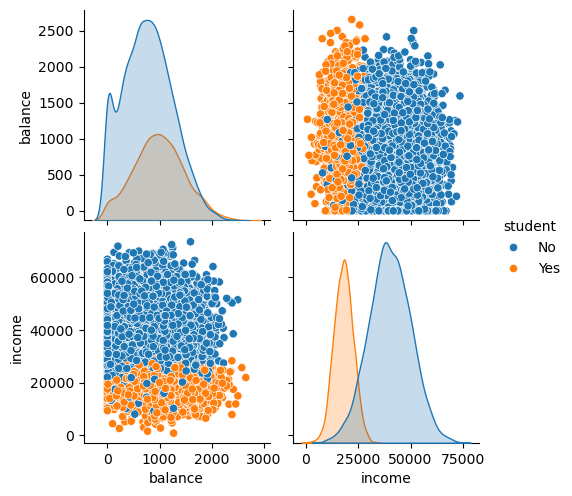

In [78]:
sns.pairplot(Default, hue = 'student')

<Axes: xlabel='default', ylabel='income'>

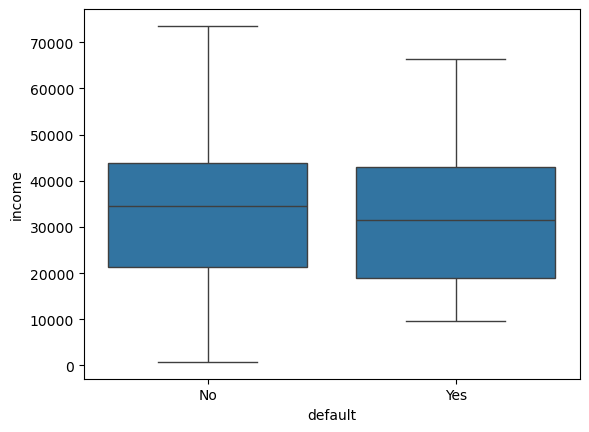

In [80]:
sns.boxplot(data=Default, x='default', y='income')

<Axes: xlabel='default', ylabel='balance'>

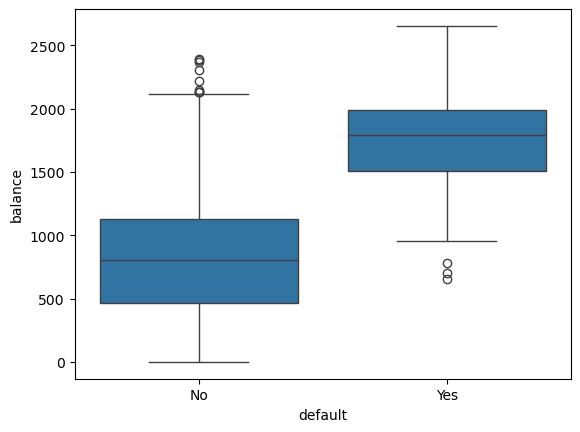

In [82]:
sns.boxplot(data=Default, x = 'default', y = 'balance')

<Axes: xlabel='student', ylabel='income'>

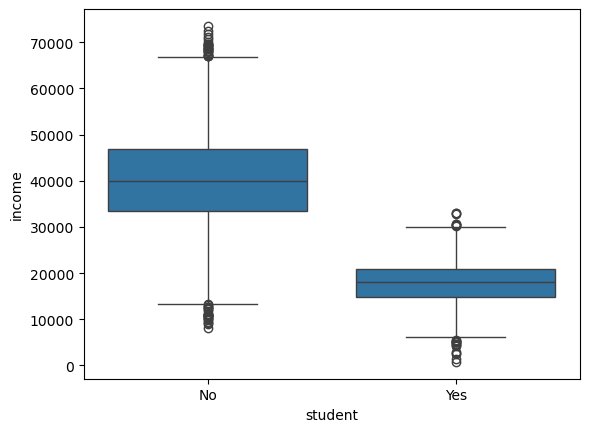

In [84]:
sns.boxplot(data=Default, x = 'student', y = 'income')

<Axes: xlabel='student', ylabel='balance'>

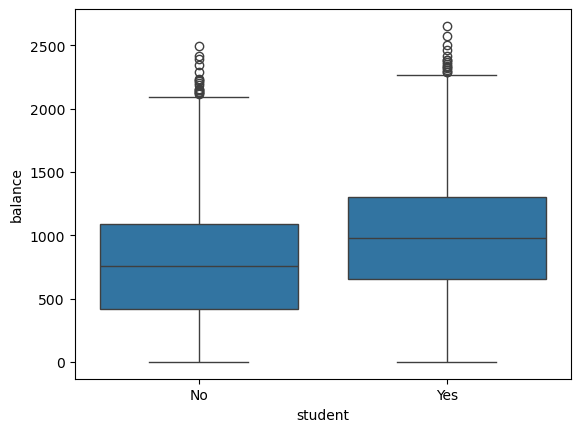

In [86]:
sns.boxplot(data=Default, x = 'student', y = 'balance')

In [90]:
np.random.seed(1)

df = Default.copy()

df['default'] = df['default'].map({'Yes':1, 'No': 0})

df = df.dropna(subset=['income', 'balance', 'default'])

X = df[['income', 'balance']]
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

logit_mod = LogisticRegression()
logit_mod.fit(X_train, y_train)

y_pred = logit_mod.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

test_error = 1 - accuracy

print(confusion_matrix(y_test, y_pred))
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Error: {test_error:.4f}")

[[4817   24]
 [ 101   58]]
Test Accuracy: 0.9750
Test Error: 0.0250


## 5c
Repeat the process in (b) three times, using three different splits
of the observations into a training set and a validation set. Comment on the results obtained.

In [106]:
np.random.seed(1)

df = Default.copy()

df['default'] = df['default'].map({'Yes':1, 'No': 0})

df = df.dropna(subset=['income', 'balance', 'default'])

X = df[['income', 'balance']]
y = df['default']

random_states = [1, 2, 3]
errors = []

for i, rs in enumerate(random_states):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rs)
    
    logit_mod = LogisticRegression()
    logit_mod.fit(X_train, y_train)
    
    y_prob = logit_mod.predict_proba(X_test)[:, 1]
    
    y_pred = (y_prob > 0.5).astype(int)
    
    error = 1- accuracy_score(y_test, y_pred)
    errors.append(error)
    
    print(f"Split {i+1} (random_state={rs}) - Validation Error: {error:.4f}")


avg_error = np.mean(errors)
print(f"\nAverage Validation Error: {avg_error:.4f}")

Split 1 (random_state=1) - Validation Error: 0.0250
Split 2 (random_state=2) - Validation Error: 0.0248
Split 3 (random_state=3) - Validation Error: 0.0248

Average Validation Error: 0.0249


**My Answer:**

Looking at the validation errors for the three separate scenarios being so close, I believe its safe to say that model is a good fit for this data. 

## 5d

Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [111]:
np.random.seed(1)

df = Default.copy()

df['default'] = df['default'].map({'Yes':1, 'No': 0})

df['student'] = df['student'].map({'Yes':1, 'No': 0}) 

df = df.dropna(subset=['income', 'balance', 'default', 'student'])


X = df[['income', 'balance','student']]
y = df['default']

random_states = [1, 2, 3]
errors = []

for i, rs in enumerate(random_states):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=rs)
    
    logit_mod = LogisticRegression()
    logit_mod.fit(X_train, y_train)
    
    y_prob = logit_mod.predict_proba(X_test)[:, 1]
    
    y_pred = (y_prob > 0.5).astype(int)
    
    error = 1- accuracy_score(y_test, y_pred)
    errors.append(error)
    
    print(f"Split {i+1} (random_state={rs}) - Validation Error: {error:.4f}")


avg_error = np.mean(errors)
print(f"\nAverage Validation Error: {avg_error:.4f}")

Split 1 (random_state=1) - Validation Error: 0.0262
Split 2 (random_state=2) - Validation Error: 0.0250
Split 3 (random_state=3) - Validation Error: 0.0252

Average Validation Error: 0.0255


Once I added student as a predictor the average test error increased from .0249 to .0255. this may be indication enough to not include student in our model as our prediction was more accurate without it. 

## **6a-d**

We continue to consider the use of a logistic regression model to
predict the probability of default using income and balance on the
Default data set. In particular, we will now compute estimates for the
standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the sm.GLM()function. Do not forget to set a random seed before beginning your analysis.

In [122]:
np.random.seed(1)
df = Default.copy()
df['default'] = df['default'].map({'Yes': 1, 'No': 0})
df = df.dropna(subset=['income', 'balance', 'default'])

X = df[['income', 'balance']]
X = sm.add_constant(X)
y = df['default']

glm_model = sm.GLM(y, X, family=sm.families.Binomial())
glm_results = glm_model.fit()

print("GLM Standard Errors:")
print(f"Income std error: {glm_results.bse['income']:.6f}")
print(f"Balance std error: {glm_results.bse['balance']:.6f}")

GLM Standard Errors:
Income std error: 0.000005
Balance std error: 0.000227


In [128]:
def boot_fn(data, index):
    sample_data = data.iloc[index]
    X_sample = sample_data[['income', 'balance']]
    X_sample = sm.add_constant(X_sample)
    y_sample = sample_data['default']
    
    glm_sample = sm.GLM(y_sample, X_sample, family=sm.families.Binomial())
    results = glm_sample.fit()
    
    return results.params['income'], results.params['balance']

In [127]:
n_bootstrap = 1000
income_coefs = []
balance_coefs = []

for i in range(n_bootstrap):
    boot_index = np.random.choice(len(df), size=len(df), replace=True)
    income_coef, balance_coef = boot_fn(df, boot_index)
    income_coefs.append(income_coef)
    balance_coefs.append(balance_coef)

income_se_boot = np.std(income_coefs)
balance_se_boot = np.std(balance_coefs)

print("Bootstrap Standard Errors:")
print(f"Income std error: {income_se_boot:.6f}")
print(f"Balance std error: {balance_se_boot:.6f}")

Bootstrap Standard Errors:
Income std error: 0.000005
Balance std error: 0.000231


Income standard error for both GLM and Boostrap ws the same however where they differed was balance standard error. Boostrap method had the higher error rate at .000231 when compared to GLM at .000227. However, since these are so close I believe that this is evidence that our GLM error rates are reliable. 

## **9**
We will now consider the Boston housing data set, from the ISLP
library.

## 9a

Based on this data set, provide an estimate for the population
mean of medv. Call this estimateˆ
µ.

In [137]:
np.random.seed(1)
Boston = load_data('Boston')

mu_hat = Boston['medv'].mean()
print(f"Population mean estimate: {mu_hat:.4f}")

Population mean estimate: 22.5328


## 9b
Provide an estimate of the standard error ofˆ
µ. Interpret this
result.
Hint: We can compute the standard error of the sample mean by
dividing the sample standard deviation by the square root of the
number of observations.

In [141]:
n = len(Boston['medv'])
sample_std = Boston['medv'].std()
se_formula = sample_std / np.sqrt(n)

print(f"Standard error using formula: {se_formula:.4f}")
print(f"This means our sample mean varies by about ±{se_formula:.4f} from the true population mean")

Standard error using formula: 0.4089
This means our sample mean varies by about ±0.4089 from the true population mean


## 9c
Now estimate the standard error ofˆ
µ using the bootstrap. How
does this compare to your answer from (b)?

In [144]:
n_bootstrap = 1000
bootstrap_means = []

for i in range(n_bootstrap):
    boot_sample = np.random.choice(Boston['medv'], size=n, replace=True)
    bootstrap_means.append(boot_sample.mean())

se_bootstrap = np.std(bootstrap_means)
print(f"Standard error using bootstrap: {se_bootstrap:.4f}")
print(f"Difference from formula: {abs(se_formula - se_bootstrap):.4f}")

Standard error using bootstrap: 0.4124
Difference from formula: 0.0035


## 9d

Based on your bootstrap estimate from (c), provide a 95 % con-
fidence interval for the mean of medv. Compare it to the results
obtained by using Boston['medv'].std() and the two standard
error rule (3.9).
Hint: You can approximate a 95 % confidence interval using the
formula [ˆ µ− 2SE(ˆ µ),
ˆ
µ + 2SE(ˆ µ)].

In [147]:
ci_lower_boot = mu_hat - 2 * se_bootstrap
ci_upper_boot = mu_hat + 2 * se_bootstrap
  
ci_lower_formula = mu_hat - 2 * se_formula
ci_upper_formula = mu_hat + 2 * se_formula

print(f"Bootstrap 95% CI: [{ci_lower_boot:.4f}, {ci_upper_boot:.4f}]")
print(f"Formula 95% CI: [{ci_lower_formula:.4f}, {ci_upper_formula:.4f}]")

Bootstrap 95% CI: [21.7080, 23.3576]
Formula 95% CI: [21.7151, 23.3505]


## 9e
Based on this data set, provide an estimate,ˆ
µmed, for the median
value of medv in the population.

In [152]:
mu_med_hat = Boston['medv'].median()
print(f"Population median estimate: {mu_med_hat:.4f}")

Population median estimate: 21.2000


## 9f
We now would like to estimate the standard error ofˆ
µmed. Unfortunately, there is no simple formula for computing the standard
error of the median. Instead, estimate the standard error of the
median using the bootstrap. Comment on your findings.


In [157]:
n_bootstrap = 1000
bootstrap_medians = []

for i in range(n_bootstrap):
    boot_sample = np.random.choice(Boston['medv'], size=n, replace=True)
    bootstrap_medians.append(np.median(boot_sample))

se_median_bootstrap = np.std(bootstrap_medians)
print(f"Standard error using bootstrap: {se_median_bootstrap:.4f}")
print(f"The median is less variable than the mean (SE of mean was {se_bootstrap:.4f})")


Standard error using bootstrap: 0.3850
The median is less variable than the mean (SE of mean was 0.4124)


## 9g
Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. Call this quantityˆ
µ0.1.
(You can use the np.percentile() function.) 

In [160]:
mu_01_hat = np.percentile(Boston['medv'], 10)
print(f"10th percentile estimate: {mu_01_hat:.4f}")

10th percentile estimate: 12.7500


## 9h

Use the bootstrap to estimate the standard error ofˆ
µ0.1. Comment on your findings.

In [163]:
bootstrap_10th = []

for i in range(n_bootstrap):
    boot_sample = np.random.choice(Boston['medv'], size=n, replace=True)
    bootstrap_10th.append(np.percentile(boot_sample, 10))

se_10th_bootstrap = np.std(bootstrap_10th)
print(f"Standard error of 10th percentile: {se_10th_bootstrap:.4f}")
print(f"The 10th percentile is more variable than the median but less than the mean")

Standard error of 10th percentile: 0.4902
The 10th percentile is more variable than the median but less than the mean
